# Cut Overscan

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
from astropy.io import fits
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [210]:
plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [211]:
!ls ../data/2021_02_17 

holo4_003_NGC4755_2021-02-17_350.fits
holo4_003_NGC4755_2021-02-17_350_noheader.fits
holo4_003_NGC4755_2021-02-17_350_noheader_cut.fits
holo4_003_NGC4755_2021-02-17_351.fits
holo4_003_NGC4755_2021-02-17_351_noheader.fits
holo4_003_NGC4755_2021-02-17_351_noheader_cut.fits
holo4_003_NGC4755_2021-02-17_352.fits
holo4_003_NGC4755_2021-02-17_352_noheader.fits
holo4_003_NGC4755_2021-02-17_352_noheader_cut.fits
holo4_003_NGC4755_2021-02-17_353.fits
holo4_003_NGC4755_2021-02-17_353_noheader.fits
holo4_003_NGC4755_2021-02-17_353_noheader_cut.fits
holo4_003_NGC4755_2021-02-17_354.fits
holo4_003_NGC4755_2021-02-17_354_noheader.fits
holo4_003_NGC4755_2021-02-17_354_noheader_cut.fits
holo4_003_NGC4755_2021-02-17_355.fits
holo4_003_NGC4755_2021-02-17_355_noheader.fits
holo4_003_NGC4755_2021-02-17_355_noheader_cut.fits
holo4_003_NGC4755_2021-02-17_356.fits
holo4_003_NGC4755_2021-02-17_356_noheader.fits
holo4_003_NGC4755_2021-02-17_356_noheader_cut.fits
holo4_003_NGC4755_2021-02-17_357.fits
holo4_003_

In [212]:
fits_image_filename="../data/2021_02_17/holo4_003_NGC4755_2021-02-17_358_noheader_cut.fits"

In [213]:
hdul = fits.open(fits_image_filename)

In [214]:
hdul.info()

Filename: ../data/2021_02_17/holo4_003_NGC4755_2021-02-17_358_noheader_cut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (4608, 4000)   float32   


In [215]:
hdr = hdul[0].header

In [216]:
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4608                                                  
NAXIS2  =                 4000                                                  
EXTEND  =                    T                                                  

In [217]:
image=hdul[0].data

In [218]:
image.shape

(4000, 4608)

In [219]:
XMIN=0
XMAX=image.shape[1]
YMIN=0
YMAX=image.shape[0]

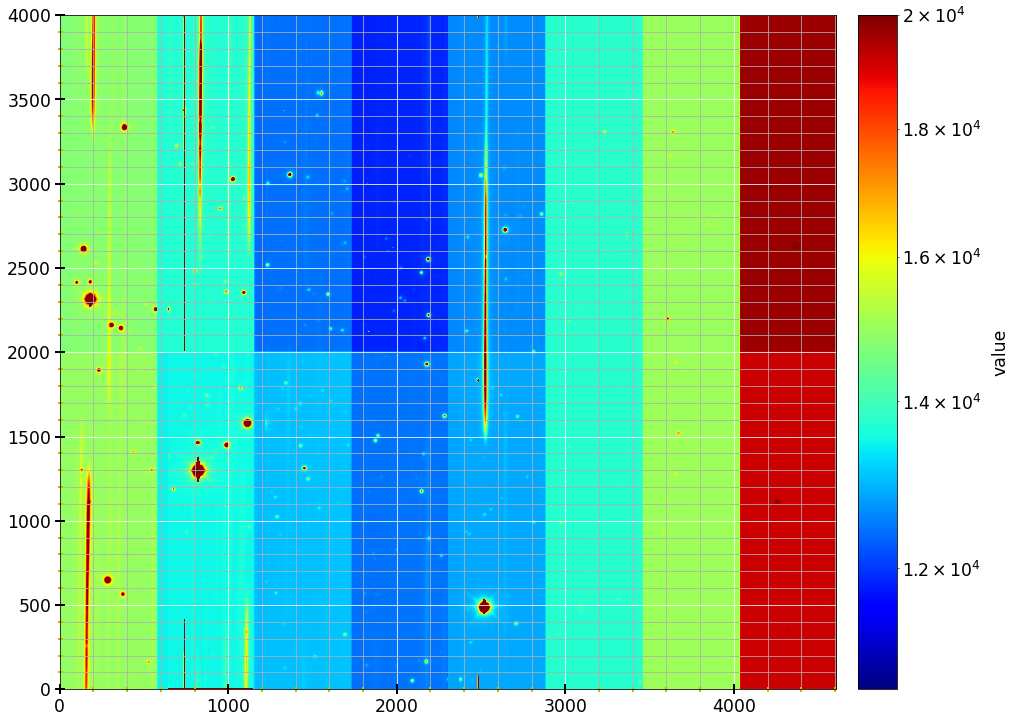

In [220]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.3)


ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='y')

im=ax.imshow(image,origin="lower",norm=colors.LogNorm(vmax=20000),extent=(XMIN,XMAX,YMIN,YMAX),cmap="jet")
cbar=fig.colorbar(im,cax=cax)
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_ylabel('value', rotation=90)

ax.minorticks_on()
ax.tick_params(which='major', length=10, width=2, direction='inout')
ax.tick_params(which='minor', length=5, width=2, direction='inout')
ax.grid(which='both')

ax.grid(color="w")

ax.set_aspect('equal')

x1, x2 = ax.get_xlim() 
y1, y2 = ax.get_ylim() 

#twin_axes=ax.twinx().twiny()
#ax2 = ax.twinx()
#twin_axes.set_xlim(ax.get_xlim())
#twin_axes.set_ylim(ax.get_ylim())



In [221]:
Y_prof=image[:,0:100].sum(axis=1)
X_prof=image[0:100:,:].sum(axis=0)

Text(0.5, 0, 'Y (pix)')

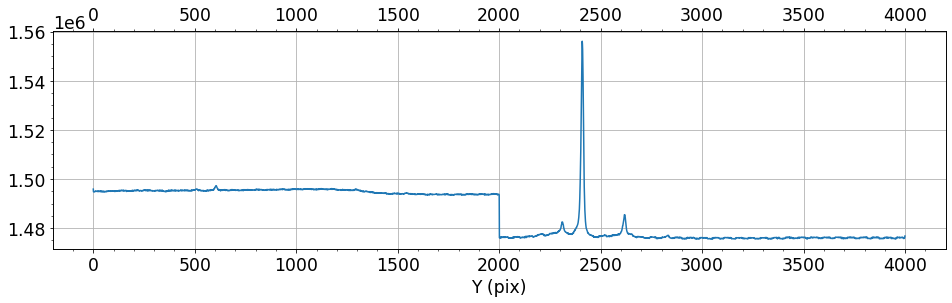

In [222]:
fig=plt.figure(figsize=(16,4))
ax=fig.add_subplot(111)
ax.plot(Y_prof)
ax.minorticks_on()
ax.grid()
ax2=ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.minorticks_on()
ax.set_xlabel("Y (pix)")

Text(0.5, 0, 'X')

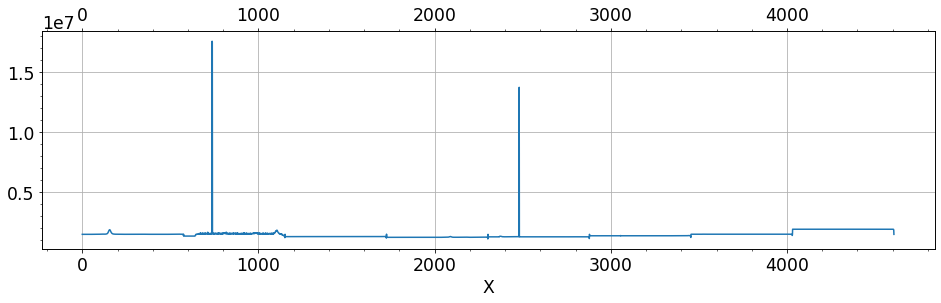

In [223]:
fig=plt.figure(figsize=(16,4))
ax=fig.add_subplot(111)
ax.plot(X_prof);
ax.minorticks_on()
ax.grid()
ax2=ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.minorticks_on()
ax.set_xlabel("X")

In [224]:
y2

4000.0